<a href="https://colab.research.google.com/github/Rohit-Singh1/Image-Processing-and-Deep-Learning/blob/main/MaxPooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAX POOLING

---
source : https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-2-max-pooling/

Max Pooling is used to teach neural networks a property called "spatial Variance". This allow network to recongnize image even texture, angle , size and other spatial features varies.

Here, the attempt is to implement Max Pooling and understand image variations

In [ ]:
# Importing various libraries 
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Downloading image from url 
url = f'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.Wf5lTQDczy4nM5IgJ3ki8gHaHa%26pid%3DApi&f=1'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img=np.array(img)  # COnverting image to numpy array

In [ ]:
# Converting image to grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
# cv2.imshow() can't be used as it causes Jupyter session to crash, so instead
# cv2_imshow is used
from google.colab.patches import cv2_imshow

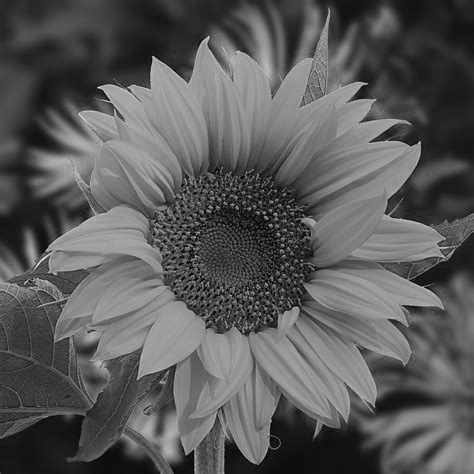

In [ ]:
cv2_imshow(img)

In [ ]:
row,col = img.shape

In max Pooling we choose a filter similar to what we  do in convoution. Here we mode filter with definite strides similar to convolution and we choose maximum value within the box and reject all other values. In this way we choose only imporant feature.

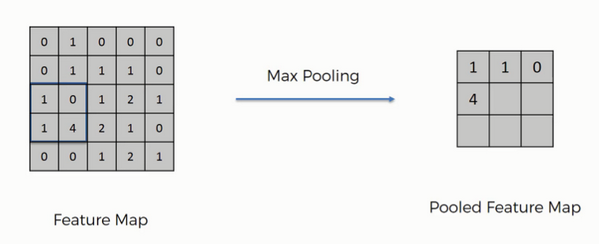

In [39]:
# zero padding is done so that filter will not go out of range when maxPooling 
# is run.
def zeroPadding(img,hBox,wBox):
  row,col = img.shape
  padRowLen = wBox-1
  padColLen = hBox-1
  rowPadded = np.append(img,np.zeros((padRowLen,col)),axis=0)
  finalImg = np.append(rowPadded,np.zeros((rowPadded.shape[0],padColLen)),axis=1)
  return finalImg

def maxPooling(img,hBox,wBox,stride):
  paddedImg = np.array(zeroPadding(img,hBox,wBox))
  pooledImg = []
  for i in range(0,row,stride):
    rowVal = []
    for j in range(0,col,stride):
      rowVal.append(np.max(paddedImg[i:i+hBox,j:j+wBox]))
    pooledImg.append(rowVal)
  
  return np.array(pooledImg)




In [40]:

image = maxPooling(img,3,3,2)

In [41]:
image.shape

(237, 237)

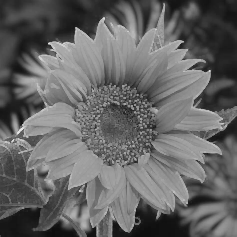

In [42]:
cv2_imshow(image)

In [43]:
image = maxPooling(img,10,10,2)

  The image will still detected after it has been pooled. Pooling also reduces feature vector dimension and helps prevent overfitting.

---
The below image helps CNN to learn variations in image


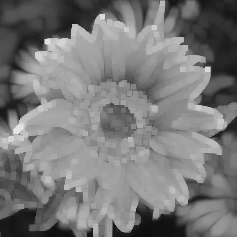

In [45]:
cv2_imshow(image)